In [87]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np

# Produção de soja

In [28]:
soja = pd.read_csv("amostra_produtividade_soja_modelagem.csv")

In [29]:
soja.head()

,nivel,codigo_ibge,name,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,MU,4100103,Abatiá,2600.0,1750.0,2100.0,2600.0,2600.0,2080.0,2590.0,3350.0,2320.0,3100.0,1460.0,2640.0,2760.0,3480.0
1,MU,4100459,Altamira do Paraná,3100.0,2460.0,2950.0,2950.0,2749.0,2749.0,3250.0,3200.0,2197.0,3223.0,3471.0,3099.0,2871.0,3818.0
2,MU,4100608,Alto Paraná,1487.0,1365.0,1734.0,2727.0,2400.0,1620.0,2899.0,2899.0,1737.0,2880.0,2000.0,1800.0,2221.0,2980.0
3,MU,4100707,Alto Piquiri,2300.0,2300.0,2700.0,3193.0,2701.0,2097.0,3130.0,3310.0,2000.0,3000.0,3192.0,3488.0,2589.0,3700.0
4,MU,4100509,Altônia,1050.0,1800.0,1255.0,2355.0,2600.0,1300.0,3000.0,2773.0,815.0,2137.0,1800.0,2455.0,2780.0,2900.0


## Produção de cada município por ano

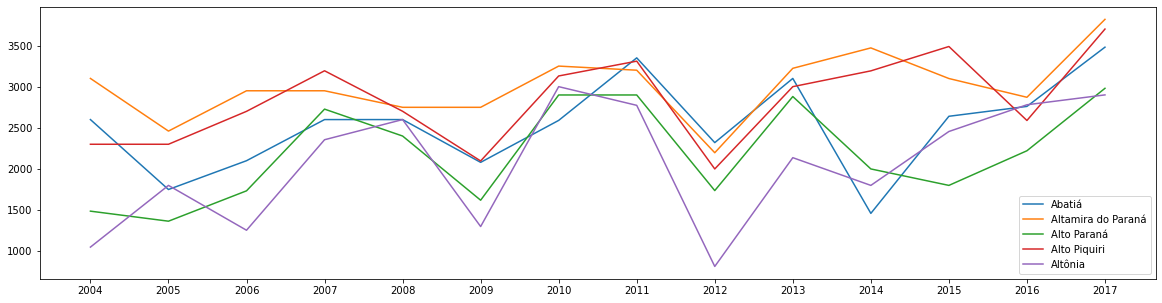

In [44]:
# create data
x = soja.columns[3:]
 
# plot lines
plt.figure(figsize=(20,5))
for i in range(5):
    plt.plot(x, soja.iloc[i,3:], label = soja.name[i])

plt.legend()
plt.show()

In [49]:
soja['media_total'] = soja[soja.columns[3:]].mean(axis=1)

In [50]:
soja.head()

,nivel,codigo_ibge,name,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,media_total
0,MU,4100103,Abatiá,2600.0,1750.0,2100.0,2600.0,2600.0,2080.0,2590.0,3350.0,2320.0,3100.0,1460.0,2640.0,2760.0,3480.0,2530.714286
1,MU,4100459,Altamira do Paraná,3100.0,2460.0,2950.0,2950.0,2749.0,2749.0,3250.0,3200.0,2197.0,3223.0,3471.0,3099.0,2871.0,3818.0,3006.214286
2,MU,4100608,Alto Paraná,1487.0,1365.0,1734.0,2727.0,2400.0,1620.0,2899.0,2899.0,1737.0,2880.0,2000.0,1800.0,2221.0,2980.0,2196.357143
3,MU,4100707,Alto Piquiri,2300.0,2300.0,2700.0,3193.0,2701.0,2097.0,3130.0,3310.0,2000.0,3000.0,3192.0,3488.0,2589.0,3700.0,2835.714286
4,MU,4100509,Altônia,1050.0,1800.0,1255.0,2355.0,2600.0,1300.0,3000.0,2773.0,815.0,2137.0,1800.0,2455.0,2780.0,2900.0,2072.857143


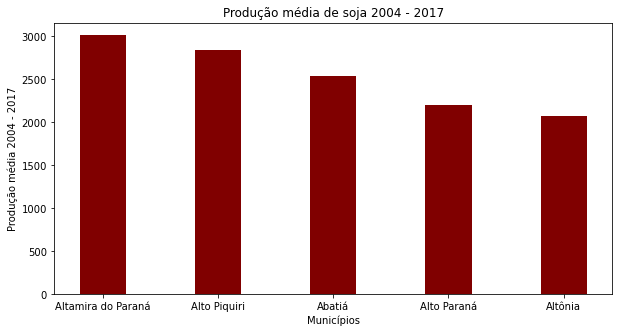

In [55]:
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(soja.sort_values(by=['media_total'], ascending=False).name, 
        soja.sort_values(by=['media_total'], ascending=False).media_total, color ='maroon',
        width = 0.4)
 
plt.xlabel("Municípios")
plt.ylabel("Produção média 2004 - 2017")
plt.title("Produção média de soja 2004 - 2017")
plt.show()

# Dados climáticos

In [58]:
clima = pd.read_csv("amostra_agroclimatology_budokai.csv")

In [59]:
clima.head()

,data,codigo_ibge,latitude,longitude,T2M_RANGE,TS,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,...,GWETROOT,GWETPROF,ALLSKY_SFC_SW_DWN,CLRSKY_SFC_SW_DWN,TOA_SW_DWN,ALLSKY_SFC_PAR_TOT,CLRSKY_SFC_PAR_TOT,ALLSKY_SFC_UVA,ALLSKY_SFC_UVB,ALLSKY_SFC_UV_INDEX
0,20030101,4100103,-23.3049,-50.3133,12.71,26.83,21.08,23.77,33.15,20.43,...,0.64,0.68,23.50,30.53,42.75,129.63,165.10,17.95,0.57,2.99
1,20030102,4100103,-23.3049,-50.3133,8.32,25.83,22.34,24.15,29.98,21.65,...,0.65,0.68,18.79,29.75,42.74,104.59,160.21,14.59,0.47,2.46
2,20030103,4100103,-23.3049,-50.3133,6.22,23.68,21.30,22.49,27.04,20.82,...,0.66,0.68,15.68,29.39,42.72,88.91,157.65,12.41,0.41,2.11
3,20030104,4100103,-23.3049,-50.3133,5.24,23.37,21.51,22.42,25.91,20.67,...,0.69,0.70,13.71,28.99,42.69,78.73,155.84,11.04,0.34,1.79
4,20030105,4100103,-23.3049,-50.3133,8.83,24.48,21.58,22.94,29.21,20.38,...,0.70,0.70,15.15,29.28,42.66,85.01,155.69,11.80,0.37,1.91


In [75]:
# a coluna data esta em formato int64, vamos passar para datetime
clima['data'] = pd.to_datetime(clima['data'].astype(str), format='%Y%m%d')

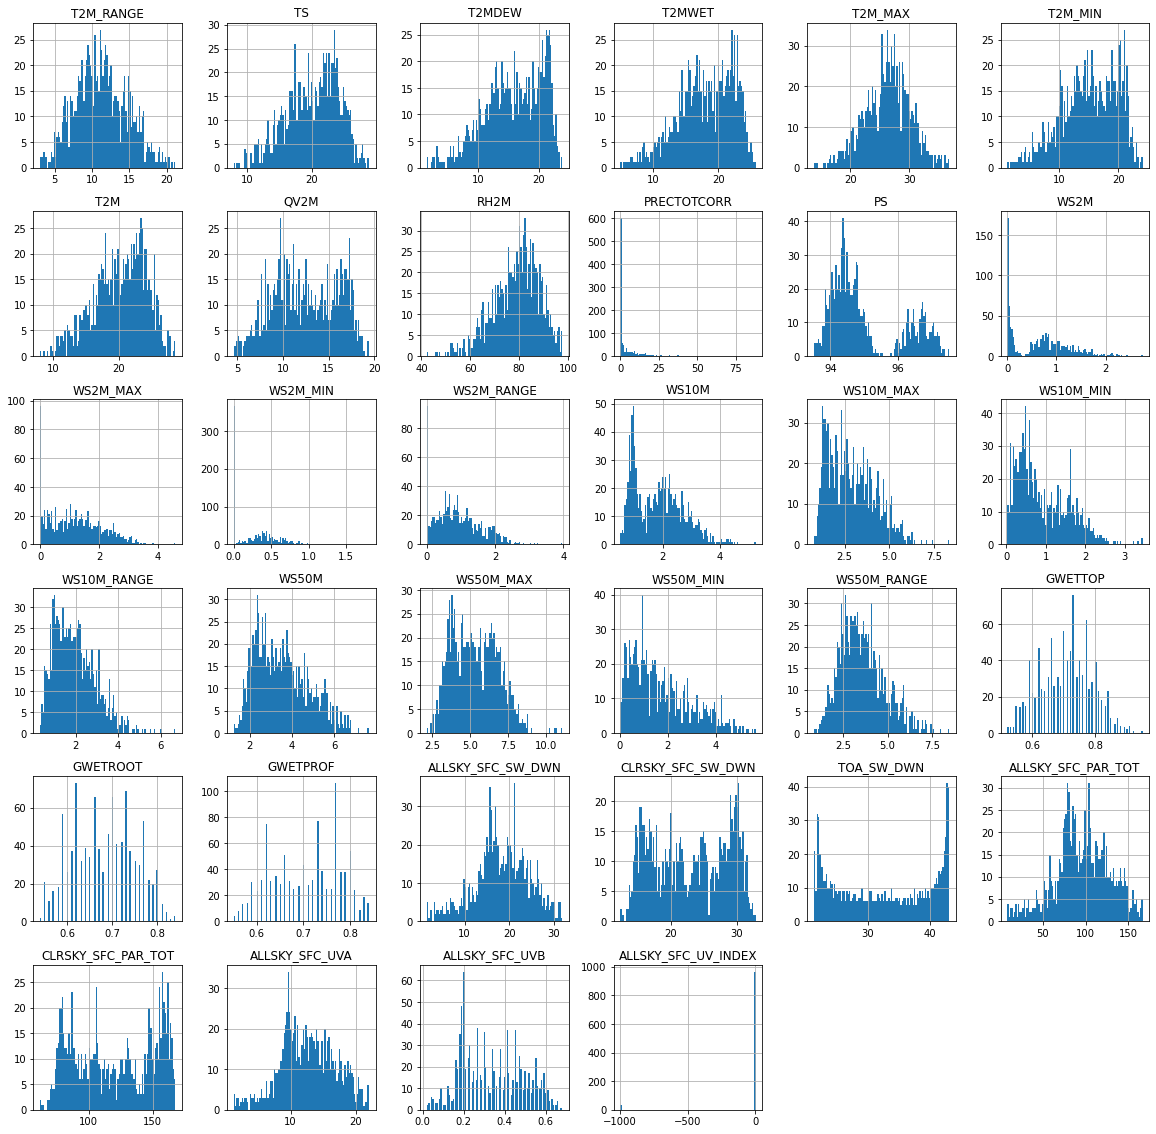

In [85]:
# vamos fazer um overlook nos dados do dataframe clima,
# porem, vamos tirar as colunas data, codigo_ibge, latitude, longitude, 

clima[clima.columns[4:]].hist(bins=100, figsize=(20, 20));

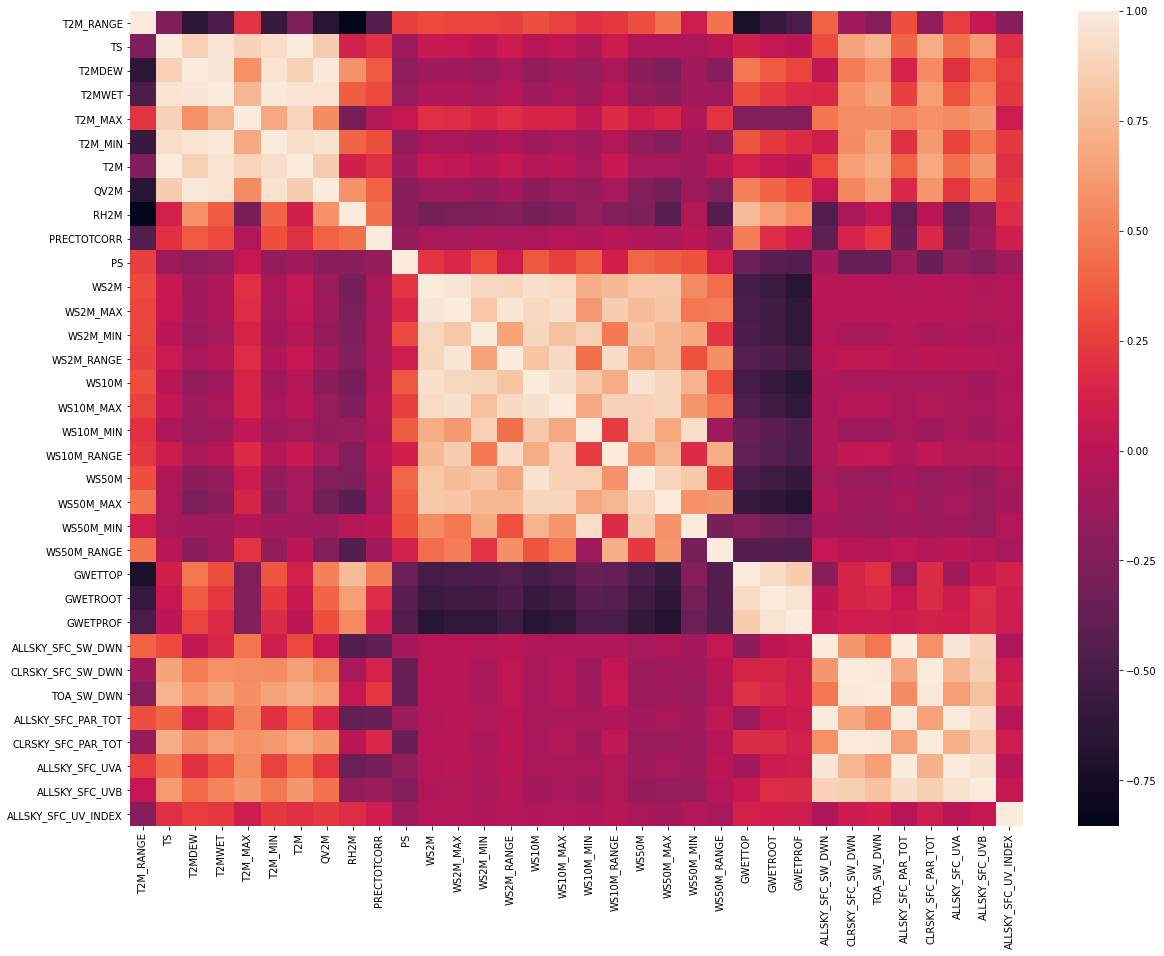

In [96]:
# heatmap para fazer um overlook das correlacoes entre as variaveis
plt.figure(figsize=(20,15));
sns.heatmap(clima[clima.columns[4:]].corr());

Vamos separar o dataframe clima por municípios

In [70]:
# separamos o df clima nos dados de cada um dos municipios
clima_abatia = clima.query('codigo_ibge == 4100103')
clima_altamira = clima.query('codigo_ibge == 4100459')
clima_alto = clima.query('codigo_ibge == 4100608')